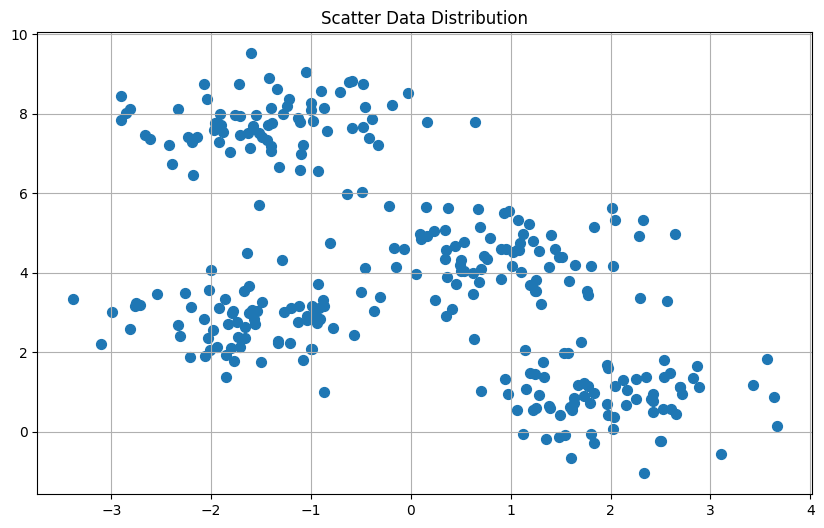

In [1]:
import pandas as pd

# นำเข้าไลบรารี matplotlib เพื่อใช้ในการวาดกราฟ
import matplotlib.pyplot as plt

# นำเข้าฟังก์ชัน make_blobs สำหรับสร้างข้อมูลจำลองแบบกลุ่ม
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

# สร้างข้อมูลจำลองจำนวน 300 จุด, จำนวนกลุ่ม = 4, ค่าความเบี่ยงเบนมาตรฐานของแต่ละกลุ่ม = 0.7
# ผลลัพธ์จะได้ X_synth เป็นตำแหน่งของจุดข้อมูล และ y_true เป็น label จริงของแต่ละจุด
X_synth, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.70, random_state=0)

plt.figure(figsize=(10, 6))

# วาดกราฟ scatter plot โดยใช้ข้อมูล X_synth ที่สร้างขึ้น
# ค่าแกน X ใช้ column ที่ 0 และค่าแกน Y ใช้ column ที่ 1
plt.scatter(X_synth[:, 0], X_synth[:, 1], s=50)

# ใส่ชื่อกราฟ
plt.title("Scatter Data Distribution")

# แสดงเส้นตารางในกราฟ
plt.grid(True)

# แสดงกราฟบนหน้าจอ
plt.show()


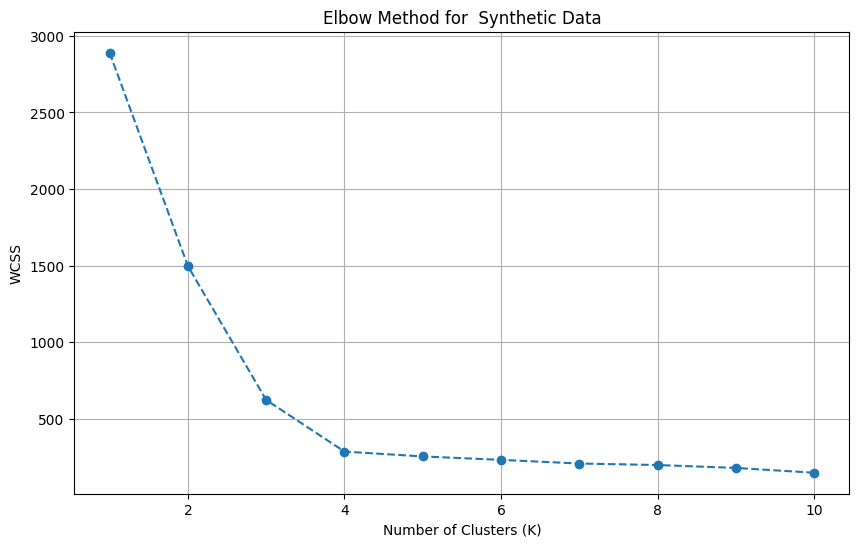

In [2]:
import pandas as pd

# นำเข้า KMeans จากไลบรารี sklearn.cluster
from sklearn.cluster import KMeans

# นำเข้า numpy สำหรับการคำนวณตัวเลข (แม้ในโค้ดนี้ยังไม่ได้ใช้โดยตรง)
import numpy as np

# # สร้างลิสต์ว่างเพื่อเก็บค่า inertia (ค่าความคลาดเคลื่อนรวมภายในกลุ่ม)
# inertia = []

# # กำหนดช่วงของจำนวนกลุ่มที่จะลอง ตั้งแต่ 1 ถึง 9
# k_range = range(1, 11)

# # วนลูปเพื่อทดลองจำนวนกลุ่มแต่ละค่า
# for k in k_range:
#     # สร้างโมเดล KMeans โดยกำหนดจำนวนกลุ่มเท่ากับ k
#     kmeans = KMeans(n_clusters=k, random_state=42)
    
#     # ฝึกโมเดลด้วยข้อมูล X_synth
#     kmeans.fit(X_synth)
    
#     # บันทึกค่า inertia (ค่าความคลาดเคลื่อนรวม) ไว้ในลิสต์
#     inertia.append(kmeans.inertia_)

wcss_synth = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_synth)
    wcss_synth.append(kmeans.inertia_)

# วาดกราฟ Elbow เพื่อดูจุดที่ค่า inertia เริ่มลดน้อยลงช้าลง (ข้อศอก)
# plt.plot(k_range, inertia, 'bo-')  # 'bo-' คือเส้นพร้อมจุดสีน้ำเงิน
# plt.plot(k_range, inertia, marker='o', linestyle='--')  # 'bo-' คือเส้นพร้อมจุดสีน้ำเงิน
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss_synth, marker='o', linestyle='--')
plt.title("Elbow Method for  Synthetic Data")# ชื่อกราฟ
plt.xlabel("Number of Clusters (K)")       # ชื่อแกน X
plt.ylabel("WCSS")             # ชื่อแกน Y
plt.grid(True)                    # แสดงเส้นตาราง
plt.show()                        # แสดงกราฟ


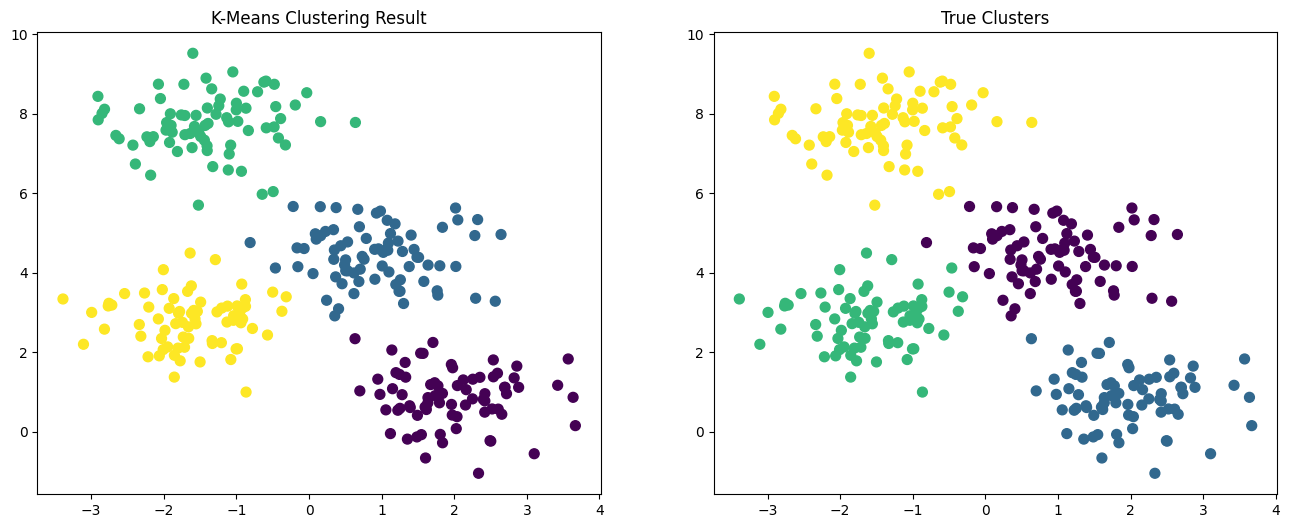

In [3]:
# สร้าง KMeans model และจัดกลุ่มข้อมูล
kmeans_synth = KMeans(n_clusters=4, random_state=42)
y_kmeans_synth = kmeans_synth.fit_predict(X_synth)

# แสดงเปรียบเทียบผลลัพธ์ K-Means กับกลุ่มจริง
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# กราฟซ้าย: แสดงผลการจัดกลุ่มโดย K-Means
axes[0].scatter(X_synth[:, 0], X_synth[:, 1], c=y_kmeans_synth, s=50, cmap='viridis')
axes[0].set_title('K-Means Clustering Result')

# กราฟขวา: แสดงกลุ่มจริงที่ใช้ตอนสร้างข้อมูล
axes[1].scatter(X_synth[:, 0], X_synth[:, 1], c=y_true, s=50, cmap='viridis')
axes[1].set_title('True Clusters')

plt.show()
